In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests
%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup

import os
import sys
import calendar
import datetime
import numpy.ma as ma
from datetime import timedelta
from dateutil.relativedelta import relativedelta
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sys
import yfinance as yf

Extracted Symbol: ZM, Company Name: Zoom Video Communications, Inc.
['ZM']
Short Name: Zoom Video Communications, Inc.
Long Name: Zoom Video Communications, Inc.
Sector: Technology
Industry: Software - Application
Previous Close: 60.23
TwoHundred Day Average: 63.690224
Fifty Day Average: 58.2539
Volume: 12026213
Zoom Video Communications, Inc.'s stock price


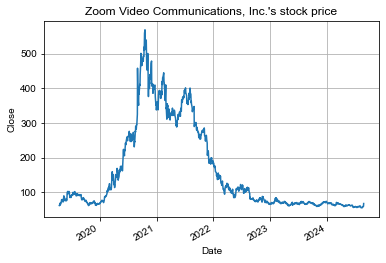

Date
2019-04-18 00:00:00-04:00    62.000000
2019-04-22 00:00:00-04:00    65.699997
2019-04-23 00:00:00-04:00    69.000000
2019-04-24 00:00:00-04:00    63.200001
2019-04-25 00:00:00-04:00    65.000000
                               ...    
2024-08-16 00:00:00-04:00    58.070000
2024-08-19 00:00:00-04:00    59.820000
2024-08-20 00:00:00-04:00    59.130001
2024-08-21 00:00:00-04:00    60.230000
2024-08-22 00:00:00-04:00    67.750000
Name: Close, Length: 1346, dtype: float64


In [2]:
#NOCT = Number of Companies taken
def Gainers(NOCT, info):
    url = "https://finance.yahoo.com/gainers"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
    }
    
    response = requests.get(url, headers=headers)
    
    if response.status_code == 404:
        print(f"Failed to retrieve data: {response.status_code}")
        return
    
    soup = BeautifulSoup(response.text, 'lxml')
    rows = soup.find_all('tr', class_='row')
    
    if not rows:
        print("No data found")
        return
    
    symbols = []
    for row in rows[:NOCT]:
        try:
            symbol = row.find('span', class_='symbol').text.strip()
            company_name = row.find('span', class_='longName').text.strip()
            print(f"Extracted Symbol: {symbol}, Company Name: {company_name}")
            symbols.append(symbol)
        except AttributeError:
            print("Failed to extract symbol or company name for this row. Skipping.")
    
    print(symbols)
    
    for name in symbols:
        ticker = yf.Ticker(name)
        try:
            cmpnme = ticker.info.get('shortName', 'N/A')
            comp_df = ticker.history(period="max")
            
            print('Short Name:', ticker.info.get('shortName', 'N/A'))
            print('Long Name:', ticker.info.get('longName', 'N/A'))
            print('Sector:', ticker.info.get('sector', 'N/A'))
            print('Industry:', ticker.info.get('industry', 'N/A'))
            print('Previous Close:', ticker.info.get('previousClose', 'N/A'))
            print('TwoHundred Day Average:', ticker.info.get('twoHundredDayAverage', 'N/A'))
            print('Fifty Day Average:', ticker.info.get('fiftyDayAverage', 'N/A'))
            print('Volume:', ticker.info.get('volume', 'N/A'))
            
            print(f"{cmpnme}'s stock price")
            
            if not comp_df.empty and info in comp_df.columns:
                comp_df[info].plot(title=f"{cmpnme}'s stock price")
                plt.xlabel("Date")
                plt.ylabel(info)
                plt.grid()
                plt.rcParams.update({'font.size': 14})
                plt.style.use('seaborn-dark')
                plt.rcParams["figure.figsize"] = (10, 6)
                plt.show()
                print(comp_df[info])
            else:
                print("No data available for plotting.")
                
        except KeyError as ke:
            print(f"Key error processing {name}: {ke}")
        except Exception as e:
            print(f"Error processing {name}: {e}")


Gainers(1, 'Close')


Extracted Symbol: ZM, Company Name: Zoom Video Communications, Inc.
['ZM']
Short Name: Zoom Video Communications, Inc.
Long Name: Zoom Video Communications, Inc.
Sector: Technology
Industry: Software - Application
Previous Close: 60.23
TwoHundred Day Average: 63.690224
Fifty Day Average: 58.2539
Volume: 12027573
Zoom Video Communications, Inc.'s stock price for the last 6 months


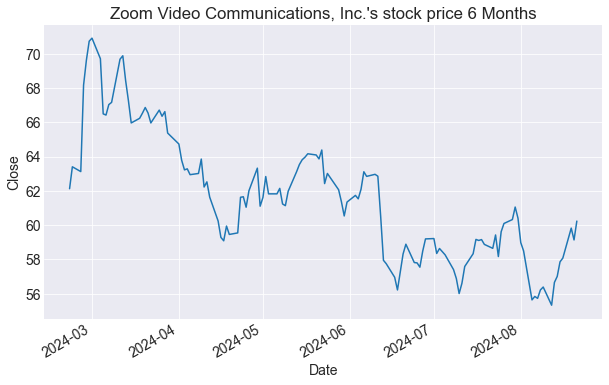

Date
2024-02-22    62.119999
2024-02-23    63.400002
2024-02-26    63.119999
2024-02-27    68.169998
2024-02-28    69.620003
                ...    
2024-08-15    57.849998
2024-08-16    58.070000
2024-08-19    59.820000
2024-08-20    59.130001
2024-08-21    60.230000
Name: Close, Length: 126, dtype: float64


In [3]:
def Gainers6M(NOCT, info):
    url = "https://finance.yahoo.com/gainers"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
    }
    
    response = requests.get(url, headers=headers)
    
    if response.status_code == 404:
        print(f"Failed to retrieve data: {response.status_code}")
        return
    
    soup = BeautifulSoup(response.text, 'lxml')
    rows = soup.find_all('tr', class_='row')
    
    if not rows:
        print("No data found")
        return
    
    symbols = []
    for row in rows[:NOCT]:
        try:
            symbol = row.find('span', class_='symbol').text.strip()
            company_name = row.find('span', class_='longName').text.strip()
            print(f"Extracted Symbol: {symbol}, Company Name: {company_name}")
            symbols.append(symbol)
        except AttributeError:
            print("Failed to extract symbol or company name for this row. Skipping.")
    
    print(symbols)
    
    for name in symbols:
        ticker = yf.Ticker(name)
        try:
            cmpnme = ticker.info.get('shortName', 'N/A')
            today = datetime.date.today()
            before = today + relativedelta(months=-6)
            comp_df = yf.download(name, start=before, end=today, progress=False)
            
            print('Short Name:', ticker.info.get('shortName', 'N/A'))
            print('Long Name:', ticker.info.get('longName', 'N/A'))
            print('Sector:', ticker.info.get('sector', 'N/A'))
            print('Industry:', ticker.info.get('industry', 'N/A'))
            print('Previous Close:', ticker.info.get('previousClose', 'N/A'))
            print('TwoHundred Day Average:', ticker.info.get('twoHundredDayAverage', 'N/A'))
            print('Fifty Day Average:', ticker.info.get('fiftyDayAverage', 'N/A'))
            print('Volume:', ticker.info.get('volume', 'N/A'))
            
            print(f"{cmpnme}'s stock price for the last 6 months")
            if not comp_df.empty:
                comp_df[info].plot(title=f"{cmpnme}'s stock price 6 Months")
                plt.xlabel("Date")
                plt.ylabel(info)
                plt.grid()
                plt.rcParams.update({'font.size': 14})
                plt.style.use('seaborn-dark')
                plt.rcParams["figure.figsize"] = (10, 6)
                plt.show()
                print(comp_df[info])
            else:
                print("No data available for plotting.")
                
        except KeyError as ke:
            print(f"Key error processing {name}: {ke}")
        except Exception as e:
            print(f"Error processing {name}: {e}")

    
Gainers6M(1, 'Close')

Extracted Symbol: NVDA, Company Name: NVIDIA Corporation
['NVDA']
Short Name: NVIDIA Corporation
Long Name: NVIDIA Corporation
Sector: Technology
Industry: Semiconductors
Previous Close: 128.5
TwoHundred Day Average: 85.26443
Fifty Day Average: 120.7592
Volume: 138099397
NVIDIA Corporation's stock price


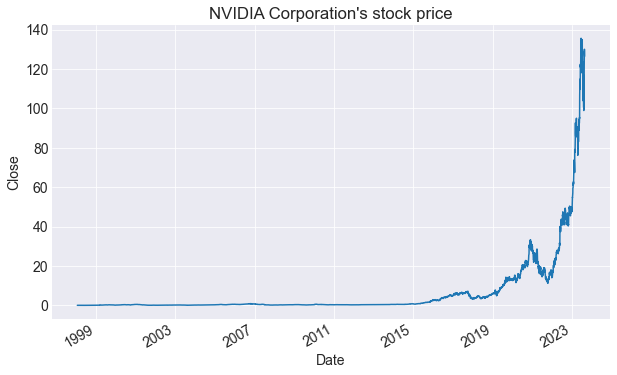

Date
1999-01-22 00:00:00-05:00      0.037621
1999-01-25 00:00:00-05:00      0.041562
1999-01-26 00:00:00-05:00      0.038337
1999-01-27 00:00:00-05:00      0.038218
1999-01-28 00:00:00-05:00      0.038098
                                ...    
2024-08-16 00:00:00-04:00    124.580002
2024-08-19 00:00:00-04:00    130.000000
2024-08-20 00:00:00-04:00    127.250000
2024-08-21 00:00:00-04:00    128.500000
2024-08-22 00:00:00-04:00    126.400002
Name: Close, Length: 6438, dtype: float64


In [4]:
def Actives(NOCT, info):
    url = "https://finance.yahoo.com/most-active"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
    }
    
    response = requests.get(url, headers=headers)
    
    if response.status_code == 404:
        print(f"Failed to retrieve data: {response.status_code}")
        return
    
    soup = BeautifulSoup(response.text, 'lxml')
    rows = soup.find_all('tr', class_='row')
    
    if not rows:
        print("No data found")
        return
    
    symbols = []
    for row in rows[:NOCT]:
        try:
            symbol = row.find('span', class_='symbol').text.strip()
            company_name = row.find('span', class_='longName').text.strip()
            print(f"Extracted Symbol: {symbol}, Company Name: {company_name}")
            symbols.append(symbol)
        except AttributeError:
            print("Failed to extract symbol or company name for this row. Skipping.")
    
    print(symbols)
    
    for name in symbols:
        ticker = yf.Ticker(name)
        try:
            cmpnme = ticker.info.get('shortName', 'N/A')
            comp_df = ticker.history(period="max")
            
            print('Short Name:', ticker.info.get('shortName', 'N/A'))
            print('Long Name:', ticker.info.get('longName', 'N/A'))
            print('Sector:', ticker.info.get('sector', 'N/A'))
            print('Industry:', ticker.info.get('industry', 'N/A'))
            print('Previous Close:', ticker.info.get('previousClose', 'N/A'))
            print('TwoHundred Day Average:', ticker.info.get('twoHundredDayAverage', 'N/A'))
            print('Fifty Day Average:', ticker.info.get('fiftyDayAverage', 'N/A'))
            print('Volume:', ticker.info.get('volume', 'N/A'))
            
            print(f"{cmpnme}'s stock price")
            
            if not comp_df.empty and info in comp_df.columns:
                comp_df[info].plot(title=f"{cmpnme}'s stock price")
                plt.xlabel("Date")
                plt.ylabel(info)
                plt.grid()
                plt.rcParams.update({'font.size': 14})
                plt.style.use('seaborn-dark')
                plt.rcParams["figure.figsize"] = (10, 6)
                plt.show()
                print(comp_df[info])
            else:
                print("No data available for plotting.")
                
        except KeyError as ke:
            print(f"Key error processing {name}: {ke}")
        except Exception as e:
            print(f"Error processing {name}: {e}")


Actives(1, 'Close')

Extracted Symbol: NVDA, Company Name: NVIDIA Corporation
['NVDA']
Short Name: NVIDIA Corporation
Long Name: NVIDIA Corporation
Sector: Technology
Industry: Semiconductors
Previous Close: 128.5
TwoHundred Day Average: 85.26443
Fifty Day Average: 120.7592
Volume: 138099397
NVIDIA Corporation's stock price for the last 6 months


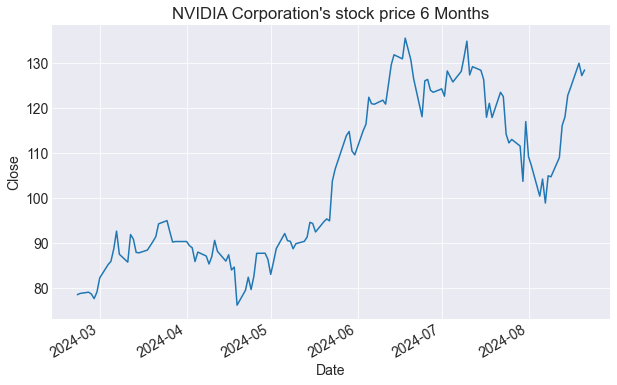

Date
2024-02-22     78.538002
2024-02-23     78.817001
2024-02-26     79.092003
2024-02-27     78.700996
2024-02-28     77.663002
                 ...    
2024-08-15    122.860001
2024-08-16    124.580002
2024-08-19    130.000000
2024-08-20    127.250000
2024-08-21    128.500000
Name: Close, Length: 126, dtype: float64


In [5]:
def Actives6M(NOCT, info):
    url = "https://finance.yahoo.com/most-active"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
    }
    
    response = requests.get(url, headers=headers)
    
    if response.status_code == 404:
        print(f"Failed to retrieve data: {response.status_code}")
        return
    
    soup = BeautifulSoup(response.text, 'lxml')
    rows = soup.find_all('tr', class_='row')
    
    if not rows:
        print("No data found")
        return
    
    symbols = []
    for row in rows[:NOCT]:
        try:
            symbol = row.find('span', class_='symbol').text.strip()
            company_name = row.find('span', class_='longName').text.strip()
            print(f"Extracted Symbol: {symbol}, Company Name: {company_name}")
            symbols.append(symbol)
        except AttributeError:
            print("Failed to extract symbol or company name for this row. Skipping.")
    
    print(symbols)
    
    for name in symbols:
        ticker = yf.Ticker(name)
        try:
            cmpnme = ticker.info.get('shortName', 'N/A')
            today = datetime.date.today()
            before = today + relativedelta(months=-6)
            comp_df = yf.download(name, start=before, end=today, progress=False)
            
            print('Short Name:', ticker.info.get('shortName', 'N/A'))
            print('Long Name:', ticker.info.get('longName', 'N/A'))
            print('Sector:', ticker.info.get('sector', 'N/A'))
            print('Industry:', ticker.info.get('industry', 'N/A'))
            print('Previous Close:', ticker.info.get('previousClose', 'N/A'))
            print('TwoHundred Day Average:', ticker.info.get('twoHundredDayAverage', 'N/A'))
            print('Fifty Day Average:', ticker.info.get('fiftyDayAverage', 'N/A'))
            print('Volume:', ticker.info.get('volume', 'N/A'))
            
            print(f"{cmpnme}'s stock price for the last 6 months")
            
            if not comp_df.empty and info in comp_df.columns:
                comp_df[info].plot(title=f"{cmpnme}'s stock price 6 Months")
                plt.xlabel("Date")
                plt.ylabel(info)
                plt.grid()
                plt.rcParams.update({'font.size': 14})
                plt.style.use('seaborn-dark')
                plt.rcParams["figure.figsize"] = (10, 6)
                plt.show()
                print(comp_df[info])
            else:
                print("No data available for plotting.")
                
        except KeyError as ke:
            print(f"Key error processing {name}: {ke}")
        except Exception as e:
            print(f"Error processing {name}: {e}")


Actives6M(1, 'Close')

Extracted Symbol: SQQQ, Company Name: ProShares UltraPro Short QQQ
['SQQQ']
Short Name: ProShares UltraPro Short QQQ
Long Name: ProShares UltraPro Short QQQ
Previous Close: 7.86
TwoHundred Day Average: 11.4604
Fifty Day Average: 8.534
Volume: 79104220
ProShares UltraPro Short QQQ's stock price


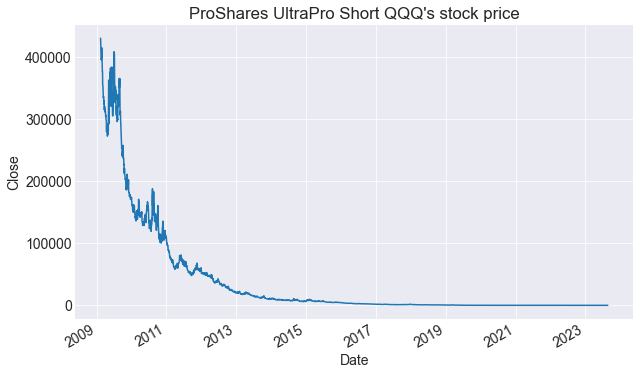

Date
2010-02-11 00:00:00-05:00    430120.65625
2010-02-12 00:00:00-05:00    426544.68750
2010-02-16 00:00:00-05:00    411402.75000
2010-02-17 00:00:00-05:00    405088.93750
2010-02-18 00:00:00-05:00    395366.87500
                                 ...     
2024-08-16 00:00:00-04:00         8.23000
2024-08-19 00:00:00-04:00         7.93000
2024-08-20 00:00:00-04:00         7.99000
2024-08-21 00:00:00-04:00         7.86000
2024-08-22 00:00:00-04:00         8.05460
Name: Close, Length: 3657, dtype: float64


In [6]:
def TopETFs(NOCT, info):
    url = "https://finance.yahoo.com/etfs"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
    }
    
    response = requests.get(url, headers=headers)
    
    if response.status_code == 404:
        print(f"Failed to retrieve data: {response.status_code}")
        return
    
    soup = BeautifulSoup(response.text, 'lxml')
    rows = soup.find_all('tr', class_='row')
    
    if not rows:
        print("No data found")
        return
    
    symbols = []
    for row in rows[:NOCT]:
        try:
            symbol = row.find('span', class_='symbol').text.strip()
            company_name = row.find('span', class_='longName').text.strip()
            print(f"Extracted Symbol: {symbol}, Company Name: {company_name}")
            symbols.append(symbol)
        except AttributeError:
            print("Failed to extract symbol or company name for this row. Skipping.")
    
    print(symbols)
    
    for name in symbols:
        ticker = yf.Ticker(name)
        try:
            cmpnme = ticker.info.get('shortName', 'N/A')
            comp_df = ticker.history(period="max")
            
            print('Short Name:', ticker.info.get('shortName', 'N/A'))
            print('Long Name:', ticker.info.get('longName', 'N/A'))
            print('Previous Close:', ticker.info.get('previousClose', 'N/A'))
            print('TwoHundred Day Average:', ticker.info.get('twoHundredDayAverage', 'N/A'))
            print('Fifty Day Average:', ticker.info.get('fiftyDayAverage', 'N/A'))
            print('Volume:', ticker.info.get('volume', 'N/A'))
            
            print(f"{cmpnme}'s stock price")
            
            if not comp_df.empty and info in comp_df.columns:
                comp_df[info].plot(title=f"{cmpnme}'s stock price")
                plt.xlabel("Date")
                plt.ylabel(info)
                plt.grid()
                plt.rcParams.update({'font.size': 14})
                plt.style.use('seaborn-dark')
                plt.rcParams["figure.figsize"] = (10, 6)
                plt.show()
                print(comp_df[info])
            else:
                print("No data available for plotting.")
                
        except KeyError as ke:
            print(f"Key error processing {name}: {ke}")
        except Exception as e:
            print(f"Error processing {name}: {e}")


TopETFs(1, 'Close')

Extracted Symbol: SQQQ, Company Name: ProShares UltraPro Short QQQ
['SQQQ']
Short Name: ProShares UltraPro Short QQQ
Long Name: ProShares UltraPro Short QQQ
Previous Close: 7.86
TwoHundred Day Average: 11.4604
Fifty Day Average: 8.534
Volume: 79111918
SQQQ's stock price for the last 6 months


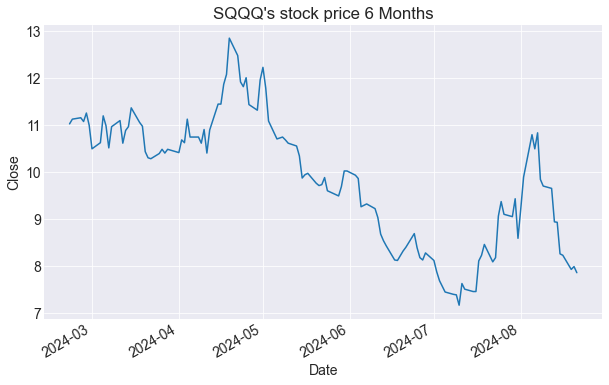

Date
2024-02-22    11.02
2024-02-23    11.12
2024-02-26    11.15
2024-02-27    11.07
2024-02-28    11.25
              ...  
2024-08-15     8.26
2024-08-16     8.23
2024-08-19     7.93
2024-08-20     7.99
2024-08-21     7.86
Name: Close, Length: 126, dtype: float64


In [7]:
def TopETFs6M(NOCT, info):
    url = "https://finance.yahoo.com/etfs"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
    }
    
    response = requests.get(url, headers=headers)
    
    if response.status_code == 404:
        print(f"Failed to retrieve data: {response.status_code}")
        return
    
    soup = BeautifulSoup(response.text, 'lxml')
    rows = soup.find_all('tr', class_='row')
    
    if not rows:
        print("No data found")
        return
    
    symbols = []
    for row in rows[:NOCT]:
        try:
            symbol = row.find('span', class_='symbol').text.strip()
            company_name = row.find('span', class_='longName').text.strip()
            print(f"Extracted Symbol: {symbol}, Company Name: {company_name}")
            symbols.append(symbol)
        except AttributeError:
            print("Failed to extract symbol or company name for this row. Skipping.")
    
    print(symbols)
    
    for name in symbols:
        ticker = yf.Ticker(name)
        try:
            cmpnme = ticker.info.get('shortName', 'N/A')
            today = datetime.date.today()
            before = today + relativedelta(months=-6)
            comp_df = yf.download(name, start=before, end=today, progress=False)
            
            print('Short Name:', ticker.info.get('shortName', 'N/A'))
            print('Long Name:', ticker.info.get('longName', 'N/A'))
            print('Previous Close:', ticker.info.get('previousClose', 'N/A'))
            print('TwoHundred Day Average:', ticker.info.get('twoHundredDayAverage', 'N/A'))
            print('Fifty Day Average:', ticker.info.get('fiftyDayAverage', 'N/A'))
            print('Volume:', ticker.info.get('volume', 'N/A'))
            
            print(f"{name}'s stock price for the last 6 months")
            
            if not comp_df.empty and info in comp_df.columns:
                comp_df[info].plot(title=f"{name}'s stock price 6 Months")
                plt.xlabel("Date")
                plt.ylabel(info)
                plt.grid()
                plt.rcParams.update({'font.size': 14})
                plt.style.use('seaborn-dark')
                plt.rcParams["figure.figsize"] = (10, 6)
                plt.show()
                print(comp_df[info])
            else:
                print("No data available for plotting.")
                
        except KeyError as ke:
            print(f"Key error processing {name}: {ke}")
        except Exception as e:
            print(f"Error processing {name}: {e}")


TopETFs6M(1, 'Close')

In [8]:
# timeframe must be one of these: '1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max'
# info 'Close' and 'Open' are good to use
#timeFrame defaults to 'max' and info defaults to 'Close'
def get_companies_info_with_graphs(companies, timeFrame = 'max', info='Close'):
    
    if isinstance(companies, str):
        companies = [companies]
    
    for company_symbol in companies:
        print(f"\nFetching data for {company_symbol}...")
        ticker = yf.Ticker(company_symbol)
        
        try:
            cmpnme = ticker.info.get('shortName', 'N/A')
            long_name = ticker.info.get('longName', 'N/A')
            sector = ticker.info.get('sector', 'N/A')
            industry = ticker.info.get('industry', 'N/A')
            previous_close = ticker.info.get('previousClose', 'N/A')
            two_hundred_day_avg = ticker.info.get('twoHundredDayAverage', 'N/A')
            fifty_day_avg = ticker.info.get('fiftyDayAverage', 'N/A')
            volume = ticker.info.get('volume', 'N/A')
            
            print('Short Name:', cmpnme)
            print('Long Name:', long_name)
            print('Sector:', sector)
            print('Industry:', industry)
            print('Previous Close:', previous_close)
            print('200-Day Average:', two_hundred_day_avg)
            print('50-Day Average:', fifty_day_avg)
            print('Volume:', volume)
            
            comp_df = ticker.history(period=timeFrame)
            
            if not comp_df.empty and info in comp_df.columns:
                plt.figure()
                comp_df[info].plot(title=f"{cmpnme}'s {info} price")
                plt.xlabel("Date")
                plt.ylabel(info)
                plt.grid()
                plt.rcParams.update({'font.size': 14})
                plt.style.use('seaborn-dark')
                plt.rcParams["figure.figsize"] = (12, 6)
                plt.show()
                
                print(comp_df[info].tail())
            else:
                print(f"No data available for plotting '{info}' for {ticker_symbol}.")
        
        except KeyError as ke:
            print(f"Key error processing {ticker_symbol}: {ke}")
        except Exception as e:
            print(f"Error processing {ticker_symbol}: {e}")


companies = ['ICF', 'AAPL']  
#get_companies_info_with_graphs(companies, '6mo')


In [9]:
def Gain_finder(NOCT):
    url = "https://finance.yahoo.com/gainers"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
    }
    
    response = requests.get(url, headers=headers)
    
    if response.status_code != 200:
        print(f"Failed to retrieve data: {response.status_code}")
        return
    
    soup = BeautifulSoup(response.text, 'lxml')
    rows = soup.find_all('tr', class_='simpTblRow')
    
    if not rows:
        print("No data found")
        return
    
    list_rows = [re.sub(r'<.*?>', '', str(cell)) for cell in soup.find_all('td')]
    
    num_entries = 10 * (NOCT + 1)
    symbols = [list_rows[i:num_entries:10] for i in range(10)]
    
    df = pd.DataFrame({
        '[Symbol]': symbols[0],
        '[Name]': symbols[1],
        '[Price (Intraday)]': symbols[2],
        '[Change]': symbols[3],
        '[% Change]': symbols[4],
        '[Volume]': symbols[5],
        '[Avg Vol (3 month)]': symbols[6],
        '[Market Cap]': symbols[7],
        '[PE Ratio (TTM)]': symbols[8]
    })
    
    print('Stocks: Gainers')
    print(df)


Gain_finder(5)

No data found


In [10]:
def active_finder(NOCT):
    url = "https://finance.yahoo.com/most-active"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
    }
    
    response = requests.get(url, headers=headers)
    
    if response.status_code != 200:
        print(f"Failed to retrieve data: {response.status_code}")
        return
    
    soup = BeautifulSoup(response.text, 'lxml')
    rows = soup.find_all('tr', class_='simpTblRow')
    
    if not rows:
        print("No data found")
        return
    
    list_rows = [re.sub(r'<.*?>', '', str(cell)) for cell in soup.find_all('td')]
    
    num_entries = 10 * (NOCT + 1)
    symbols = [list_rows[i:num_entries:10] for i in range(10)]
    
    df = pd.DataFrame({
        '[Symbol]': symbols[0],
        '[Name]': symbols[1],
        '[Price (Intraday)]': symbols[2],
        '[Change]': symbols[3],
        '[% Change]': symbols[4],
        '[Volume]': symbols[5],
        '[Avg Vol (3 month)]': symbols[6],
        '[Market Cap]': symbols[7],
        '[PE Ratio (TTM)]': symbols[8]
    })
    
    print('Stocks: Most Actives')
    print(df)


active_finder(5)

No data found


In [11]:
def TopETF_finder(NOCT):
    url = "https://finance.yahoo.com/etfs"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
    }
    
    response = requests.get(url, headers=headers)
    
    if response.status_code != 200:
        print(f"Failed to retrieve data: {response.status_code}")
        return
    
    soup = BeautifulSoup(response.text, 'lxml')
    rows = soup.find_all('tr', class_='simpTblRow')
    
    if not rows:
        print("No data found")
        return
    
    list_rows = [re.sub(r'<.*?>', '', str(cell)) for cell in soup.find_all('td')]
    
    num_entries = 9 * (NOCT + 1)
    symbols = [list_rows[i:num_entries:9] for i in range(9)]
    
    df = pd.DataFrame({
        '[Symbol]': symbols[0],
        '[Name]': symbols[1],
        '[Price (Intraday)]': symbols[2],
        '[Change]': symbols[3],
        '[% Change]': symbols[4],
        '[Volume]': symbols[5],
        '[50 Day Average]': symbols[6],
        '[200 Day Average]': symbols[7]
    })
    
    print('Top ETFs')
    print(df)


TopETF_finder(5)

No data found


In [12]:
def loser_finder(NOCT):
    url = "https://finance.yahoo.com/losers"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
    }
    
    response = requests.get(url, headers=headers)
    
    if response.status_code != 200:
        print(f"Failed to retrieve data: {response.status_code}")
        return
    
    soup = BeautifulSoup(response.text, 'lxml')
    rows = soup.find_all('tr', class_='simpTblRow')
    
    if not rows:
        print("No data found")
        return
    
    list_rows = [re.sub(r'<.*?>', '', str(cell)) for cell in soup.find_all('td')]
    
    num_entries = 10 * (NOCT + 1)
    symbols = [list_rows[i:num_entries:10] for i in range(10)]
    
    df = pd.DataFrame({
        '[Symbol]': symbols[0],
        '[Name]': symbols[1],
        '[Price (Intraday)]': symbols[2],
        '[Change]': symbols[3],
        '[% Change]': symbols[4],
        '[Volume]': symbols[5],
        '[Avg Vol (3 month)]': symbols[6],
        '[Market Cap]': symbols[7],
        '[PE Ratio (TTM)]': symbols[8]
    })
    
    print('Stocks: Losers')
    print(df)


loser_finder(5)

No data found


In [13]:
def get_company_info(companyCode):
    company = yf.Ticker(companyCode)
    info = company.info
    hist = company.history(period="1mo")
    hist_metadata = company.history_metadata
    actions = company.actions
    dividends = company.dividends
    splits = company.splits
    capital_gains = getattr(company, 'capital_gains', None)  
    shares = company.get_shares_full(start="2022-01-01", end=None)
    income_stmt = company.income_stmt
    quarterly_income_stmt = company.quarterly_income_stmt
    balance_sheet = company.balance_sheet
    quarterly_balance_sheet = company.quarterly_balance_sheet
    cashflow = company.cashflow
    quarterly_cashflow = company.quarterly_cashflow
    major_holders = company.major_holders
    institutional_holders = company.institutional_holders
    mutualfund_holders = company.mutualfund_holders
    insider_transactions = company.insider_transactions
    insider_purchases = company.insider_purchases
    insider_roster_holders = company.insider_roster_holders
    sustainability = company.sustainability
    recommendations = company.recommendations
    recommendations_summary = company.recommendations_summary
    upgrades_downgrades = company.upgrades_downgrades
    earnings_dates = company.earnings_dates
    isin = getattr(company, 'isin', None)
    options = company.options
    news = company.news
    option_expiration_date = '2024-08-09'
    option_chain = company.option_chain(option_expiration_date) if option_expiration_date in company.options else None
    
    return {
        'info': info,
        'history': hist,
        'history_metadata': hist_metadata,
        'actions': actions,
        'dividends': dividends,
        'splits': splits,
        'capital_gains': capital_gains,
        'shares': shares,
        'income_statement': income_stmt,
        'quarterly_income_statement': quarterly_income_stmt,
        'balance_sheet': balance_sheet,
        'quarterly_balance_sheet': quarterly_balance_sheet,
        'cashflow': cashflow,
        'quarterly_cashflow': quarterly_cashflow,
        'major_holders': major_holders,
        'institutional_holders': institutional_holders,
        'mutualfund_holders': mutualfund_holders,
        'insider_transactions': insider_transactions,
        'insider_purchases': insider_purchases,
        'insider_roster_holders': insider_roster_holders,
        'sustainability': sustainability,
        'recommendations': recommendations,
        'recommendations_summary': recommendations_summary,
        'upgrades_downgrades': upgrades_downgrades,
        'earnings_dates': earnings_dates,
        'isin': isin,
        'options': options,
        'news': news,
        'option_chain': option_chain
    }



company_info = get_company_info("AAPL")
print(company_info)

print("Basic Information:")
print(company_info['info'])
print("\nHistorical Data (Last Month):")
print(company_info['history'])
print("\nEarnings Dates:")
print(company_info['earnings_dates'])

{'info': {'address1': 'One Apple Park Way', 'city': 'Cupertino', 'state': 'CA', 'zip': '95014', 'country': 'United States', 'phone': '408 996 1010', 'website': 'https://www.apple.com', 'industry': 'Consumer Electronics', 'industryKey': 'consumer-electronics', 'industryDisp': 'Consumer Electronics', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcast

Extracted Symbol: ZM, Company Name: Zoom Video Communications, Inc.
Extracted Symbol: GRFS, Company Name: Grifols, S.A.
Extracted Symbol: OSIS, Company Name: OSI Systems, Inc.
Extracted Symbol: TBBB, Company Name: BBB Foods Inc.
Extracted Symbol: QXO, Company Name: QXO, Inc.
Short Name: Zoom Video Communications, Inc.
Long Name: Zoom Video Communications, Inc.
Sector: Technology
Industry: Software - Application
Previous Close: 60.23
TwoHundred Day Average: 63.690224
Fifty Day Average: 58.2539
Volume: 12040151
Zoom Video Communications, Inc.'s stock price


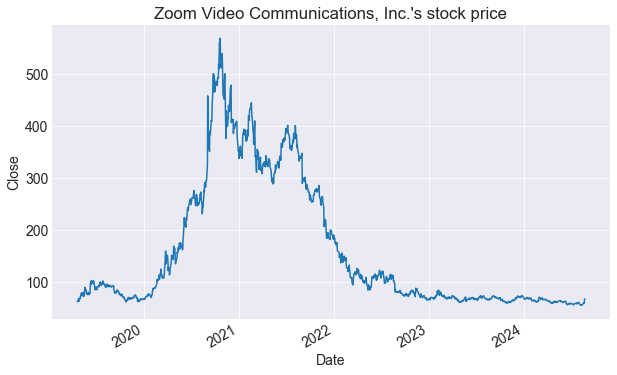

Date
2019-04-18 00:00:00-04:00    62.000000
2019-04-22 00:00:00-04:00    65.699997
2019-04-23 00:00:00-04:00    69.000000
2019-04-24 00:00:00-04:00    63.200001
2019-04-25 00:00:00-04:00    65.000000
                               ...    
2024-08-16 00:00:00-04:00    58.070000
2024-08-19 00:00:00-04:00    59.820000
2024-08-20 00:00:00-04:00    59.130001
2024-08-21 00:00:00-04:00    60.230000
2024-08-22 00:00:00-04:00    67.790001
Name: Close, Length: 1346, dtype: float64
Short Name: Grifols, S.A.
Long Name: Grifols, S.A.
Sector: Healthcare
Industry: Drug Manufacturers - General
Previous Close: 7.67
TwoHundred Day Average: 7.89725
Fifty Day Average: 7.4056
Volume: 4158692
Grifols, S.A.'s stock price


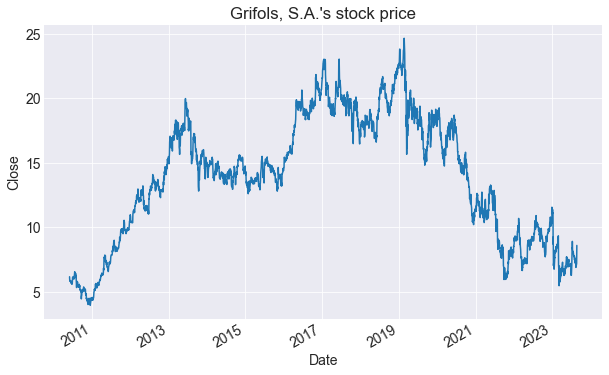

Date
2011-06-02 00:00:00-04:00    6.165934
2011-06-03 00:00:00-04:00    5.964432
2011-06-06 00:00:00-04:00    5.843531
2011-06-07 00:00:00-04:00    5.867712
2011-06-08 00:00:00-04:00    5.811292
                               ...   
2024-08-16 00:00:00-04:00    7.060000
2024-08-19 00:00:00-04:00    7.180000
2024-08-20 00:00:00-04:00    7.190000
2024-08-21 00:00:00-04:00    7.670000
2024-08-22 00:00:00-04:00    8.595000
Name: Close, Length: 3328, dtype: float64
Short Name: OSI Systems, Inc.
Long Name: OSI Systems, Inc.
Sector: Technology
Industry: Electronic Components
Previous Close: 144.62
TwoHundred Day Average: 133.57655
Fifty Day Average: 141.265
Volume: 210598
OSI Systems, Inc.'s stock price


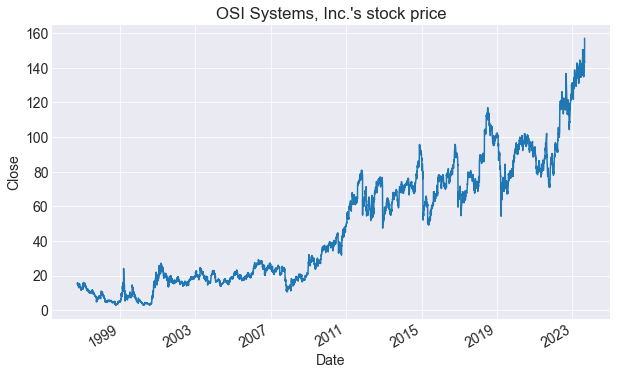

Date
1997-10-02 00:00:00-04:00     15.125000
1997-10-03 00:00:00-04:00     15.500000
1997-10-06 00:00:00-04:00     15.875000
1997-10-07 00:00:00-04:00     15.750000
1997-10-08 00:00:00-04:00     15.000000
                                ...    
2024-08-16 00:00:00-04:00    144.020004
2024-08-19 00:00:00-04:00    143.690002
2024-08-20 00:00:00-04:00    142.910004
2024-08-21 00:00:00-04:00    144.619995
2024-08-22 00:00:00-04:00    157.100006
Name: Close, Length: 6766, dtype: float64
Short Name: BBB Foods Inc.
Long Name: BBB Foods Inc.
Sector: Consumer Defensive
Industry: Discount Stores
Previous Close: 28.56
TwoHundred Day Average: 23.648954
Fifty Day Average: 25.235
Volume: 598438
BBB Foods Inc.'s stock price


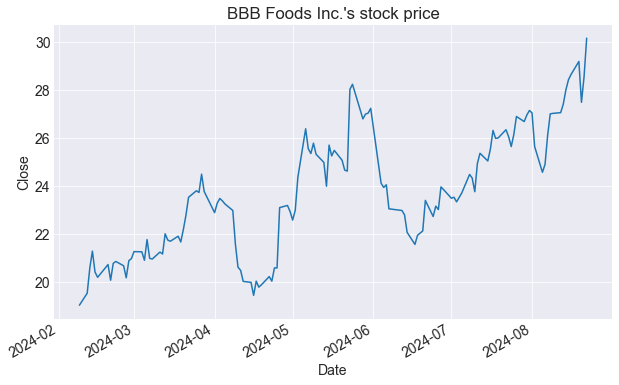

Date
2024-02-09 00:00:00-05:00    19.049999
2024-02-12 00:00:00-05:00    19.549999
2024-02-13 00:00:00-05:00    20.600000
2024-02-14 00:00:00-05:00    21.299999
2024-02-15 00:00:00-05:00    20.430000
                               ...    
2024-08-16 00:00:00-04:00    28.650000
2024-08-19 00:00:00-04:00    29.190001
2024-08-20 00:00:00-04:00    27.490000
2024-08-21 00:00:00-04:00    28.559999
2024-08-22 00:00:00-04:00    30.160000
Name: Close, Length: 135, dtype: float64
Short Name: QXO, Inc.
Long Name: QXO, Inc.
Sector: Technology
Industry: Software - Application
Previous Close: 13.51
TwoHundred Day Average: 92.9243
Fifty Day Average: 58.641
Volume: 3606298
QXO, Inc.'s stock price


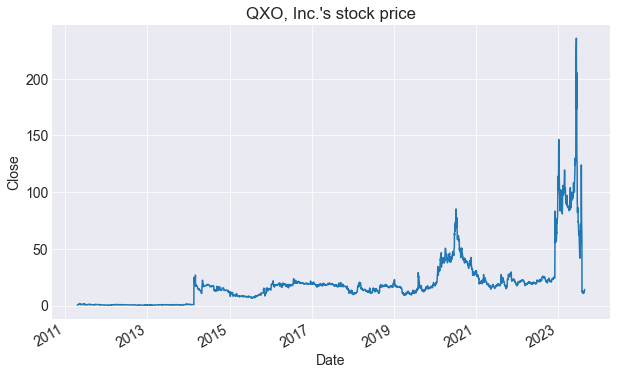

Date
2012-04-17 00:00:00-04:00     0.448020
2012-04-18 00:00:00-04:00     0.627228
2012-04-19 00:00:00-04:00     0.627228
2012-04-20 00:00:00-04:00     0.716833
2012-04-23 00:00:00-04:00     0.716833
                               ...    
2024-08-16 00:00:00-04:00    12.620000
2024-08-19 00:00:00-04:00    12.260000
2024-08-20 00:00:00-04:00    12.400000
2024-08-21 00:00:00-04:00    13.510000
2024-08-22 00:00:00-04:00    14.240000
Name: Close, Length: 3108, dtype: float64


In [14]:
import requests
from bs4 import BeautifulSoup
import yfinance as yf
import matplotlib.pyplot as plt

# NOCT = Number of Companies taken
def Gainers(NOCT, info):
    url = "https://finance.yahoo.com/markets/stocks/gainers"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
    }
    
    response = requests.get(url, headers=headers)
    
    if response.status_code == 404:
        print(f"Failed to retrieve data: {response.status_code}")
        return
    
    soup = BeautifulSoup(response.text, 'lxml')
    rows = soup.find_all('tr', class_='row')
    
    if not rows:
        print("No data found")
        return
    
    symbols = []
    for row in rows[:NOCT]:
        try:
            
            symbol = row.find('span', class_='symbol').text.strip()
            company_name = row.find('span', class_='longName').text.strip()
            print(f"Extracted Symbol: {symbol}, Company Name: {company_name}")
            symbols.append(symbol)
        except AttributeError:
            print("Failed to extract symbol or company name for this row. Skipping.")
    
    if not symbols:
        print("No symbols extracted.")
        return
    
    for name in symbols:
        ticker = yf.Ticker(name)
        try:
            cmpnme = ticker.info.get('shortName', 'N/A')
            comp_df = ticker.history(period="max")
            
            print('Short Name:', ticker.info.get('shortName', 'N/A'))
            print('Long Name:', ticker.info.get('longName', 'N/A'))
            print('Sector:', ticker.info.get('sector', 'N/A'))
            print('Industry:', ticker.info.get('industry', 'N/A'))
            print('Previous Close:', ticker.info.get('previousClose', 'N/A'))
            print('TwoHundred Day Average:', ticker.info.get('twoHundredDayAverage', 'N/A'))
            print('Fifty Day Average:', ticker.info.get('fiftyDayAverage', 'N/A'))
            print('Volume:', ticker.info.get('volume', 'N/A'))
            
            print(f"{cmpnme}'s stock price")
            
            if not comp_df.empty and info in comp_df.columns:
                comp_df[info].plot(title=f"{cmpnme}'s stock price")
                plt.xlabel("Date")
                plt.ylabel(info)
                plt.grid()
                plt.rcParams.update({'font.size': 14})
                plt.style.use('seaborn-dark')
                plt.rcParams["figure.figsize"] = (10, 6)
                plt.show()
                print(comp_df[info])
            else:
                print("No data available for plotting.")
                
        except KeyError as ke:
            print(f"Key error processing {name}: {ke}")
        except Exception as e:
            print(f"Error processing {name}: {e}")

Gainers(5, 'Close')
